上一篇中提到了柱状图和直方图的区别并介绍了柱状图的用法，本篇介绍直方图。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']

np.random.seed(1)
data = np.random.randn(1000, 2)

# 函数格式
```python
hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
```
这个函数等价于
```python
counts, bins = np.histogram(x) # 首先生成数据分布
plt.stairs(counts, bins) # 画图
```

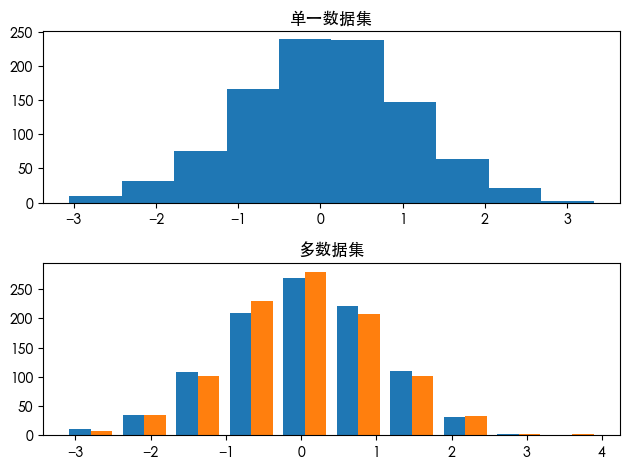

In [2]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('单一数据集')

ax2.hist(x = data)
ax2.set_title('多数据集')
fig.tight_layout()
plt.show()

## `x` & `data`
数据来源，不再赘述。

## `bins`
可取整数，整数序列或字符串。默认值为 `rcParams["hist.bins"]`，默认值为 10。
- 整数：

将数据范围等分进行分箱。

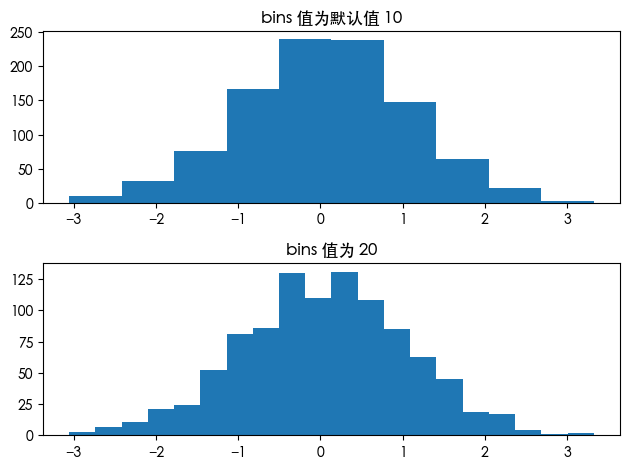

In [3]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('bins 值为默认值 10')

ax2.hist(x = data[:, 0], bins = 20)
ax2.set_title('bins 值为 20')
fig.tight_layout()
plt.show()

- 整数序列：

序列中两个相邻的数字为一个箱子的边界，最后一个箱子的边界为左闭右闭，前面的箱子边界为左闭右开。

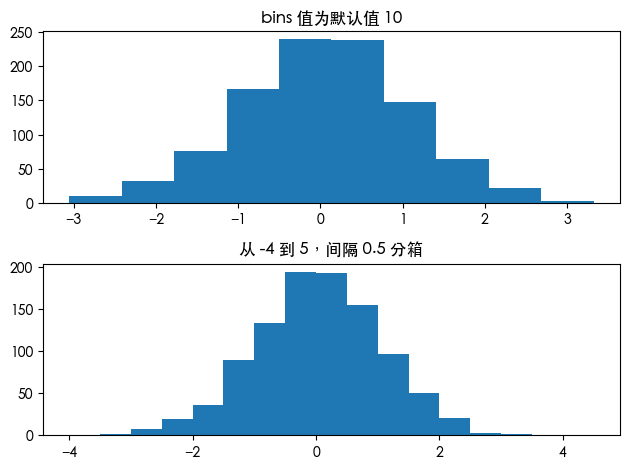

In [4]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('bins 值为默认值 10')

ax2.hist(x = data[:, 0], bins = np.arange(-4, 5, 0.5))
ax2.set_title('从 -4 到 5，间隔 0.5 分箱')
fig.tight_layout()
plt.show()

- 字符串：
可在 'auto'，'fd'，'doane'，'scott'，'stone'，'rice'，'sturges'，或 'sqrt' 中进行选择。文章长度限制仅展示 `sturges`，可查阅 `numpy.histogram_bin_edges` 文档了解更多信息。

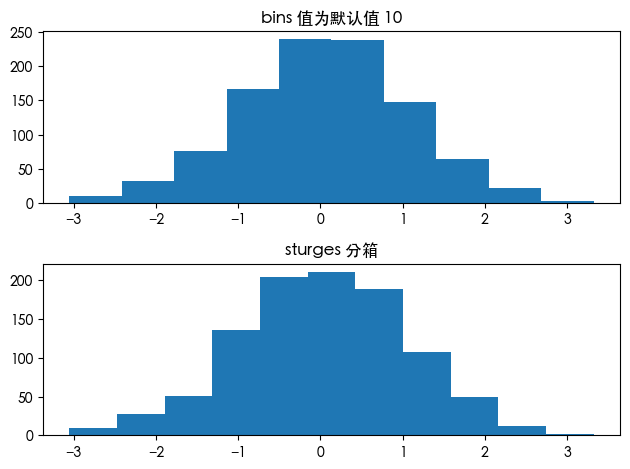

In [5]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('bins 值为默认值 10')

ax2.hist(x = data[:, 0], bins = 'sturges')
ax2.set_title('sturges 分箱')
fig.tight_layout()
plt.show()

## `range`
分箱的上下界，越界的数据将被忽略。可选值为两个浮点数组成的元组或者 `None`，默认为 `None`，此时取 `(x.min(), x.max())`。若参数 `bins` 为序列，此参数无效。

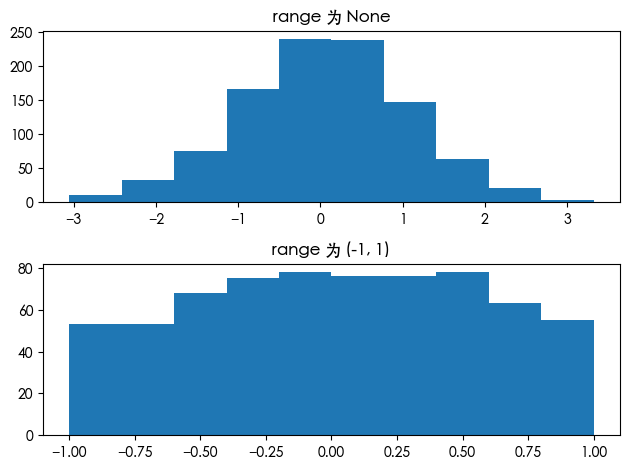

In [6]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('range 为 None')

ax2.hist(x = data[:, 0], range=(-1, 1))
ax2.set_title('range 为 (-1, 1)')
fig.tight_layout()
plt.show()

## `density`
布尔值，默认为 `Fasle`。如果是 `True`，将计数转换成概率密度。

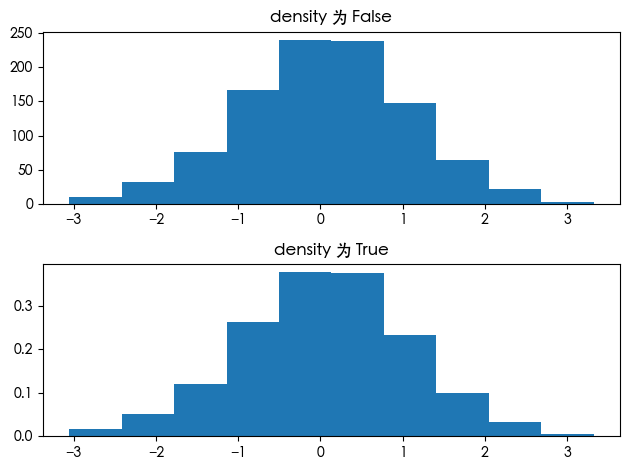

In [7]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('density 为 False')

ax2.hist(x = data[:, 0], density=True)
ax2.set_title('density 为 True')
fig.tight_layout()
plt.show()

## `weights`
权重，与 x 长度相同的序列或 `None`，默认为 `None`。若为 `None`，则 x 中的每个元素的权重为 1。若 `density` 为 `True`，则整个数据集的密度和为 1。

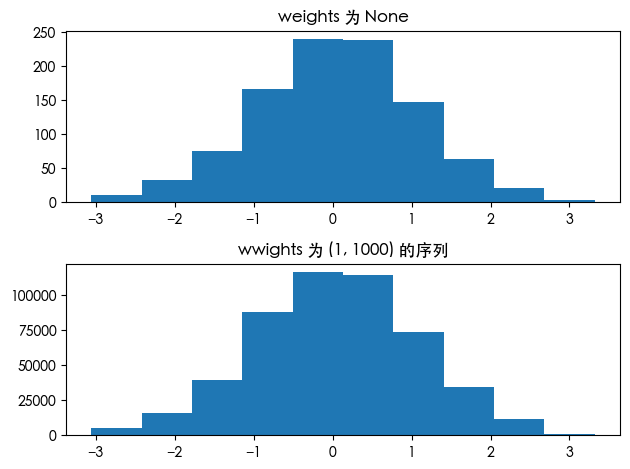

In [8]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('weights 为 None')

ax2.hist(x = data[:, 0], weights = np.arange(1000))
ax2.set_title('wwights 为 (1, 1000) 的序列')
fig.tight_layout()
plt.show()

## `cumulative`
布尔值或数字，默认为 `False`。如果是 `True` 或是大于 0 的数字，则每个区间的计数为该区间的计数加上全部比它小的区间的计数。若是小于 0 的数字，则计数翻转。

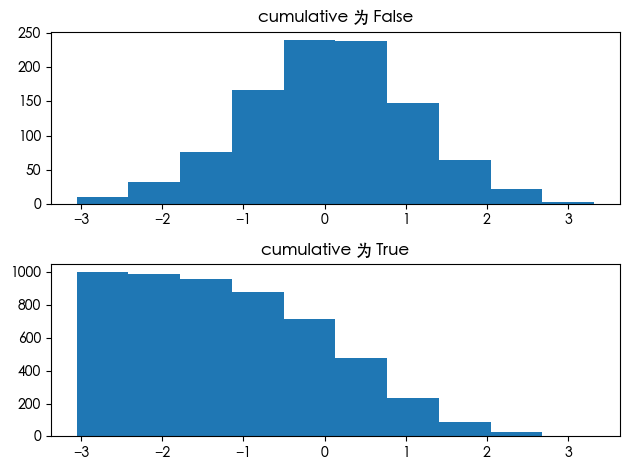

In [9]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('cumulative 为 False')

ax2.hist(x = data[:, 0], cumulative=-1)
ax2.set_title('cumulative 为 True')
fig.tight_layout()
plt.show()

## `bottom`
区间底部的位置。参数是与分箱数量相等的数组，标量或 `None`，默认为 `None`。如果是标量，则全部区间计数的底部从 `bottom` 变成 `bottom + hist(x, bins)`。如果是数组，每个区间分别于对应值相加。

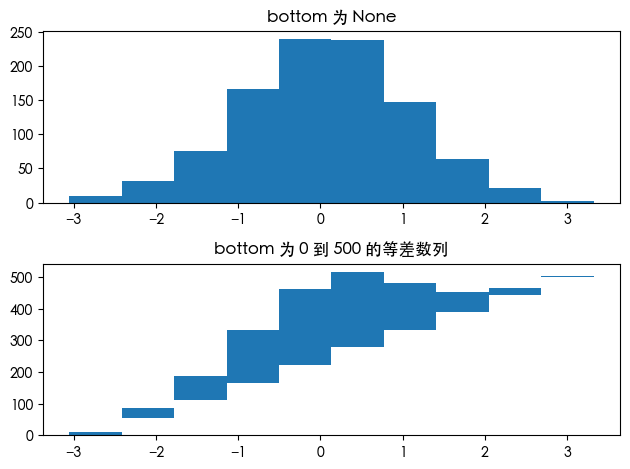

In [10]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('bottom 为 None')

ax2.hist(x = data[:, 0], bottom=np.linspace(0, 500, 10))
ax2.set_title('bottom 为 0 到 500 的等差数列')
fig.tight_layout()
plt.show()

## `histtype`
直方图类别，'bar'，'barstacked'，'step'，'stepfilled' 中的任意一个，默认为 'bar'。
- 'bar'：默认直方图类型。如果有多个直方图，则左右排列。
- 'barstacked'：如果有多个直方图，上下叠加。
- 'step'：使用没有填充的线绘制直方图的轮廓。
- 'stepfilled'：绘制直方图的轮廓后填充。

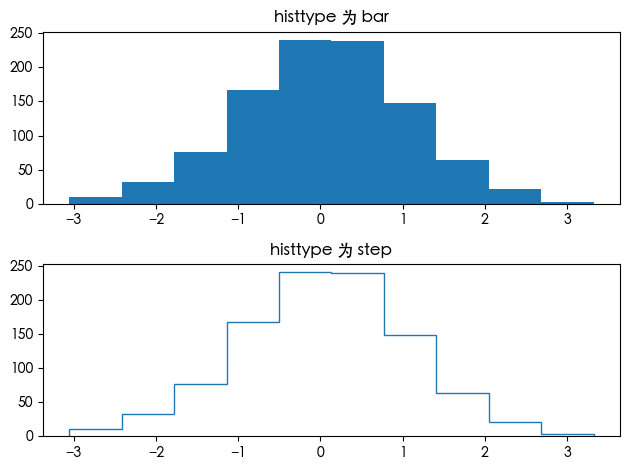

In [11]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('histtype 为 bar')

ax2.hist(x = data[:, 0], histtype='step')
ax2.set_title('histtype 为 step')
fig.tight_layout()
plt.show()

## `align`
区间的水平排列，可以是 'left'，'mid' 或 'right'，默认是 'mid'。

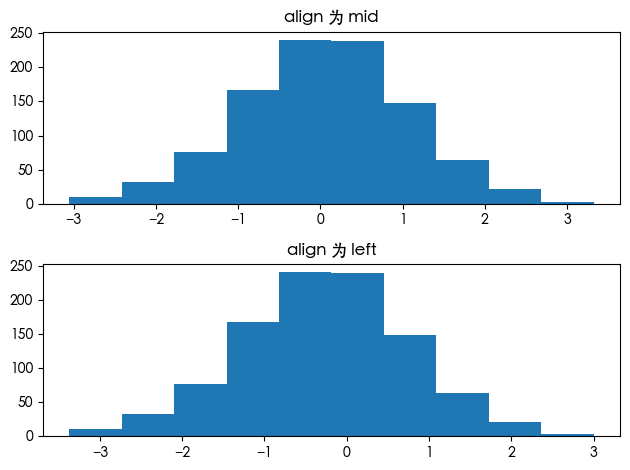

In [12]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('align 为 mid')

ax2.hist(x = data[:, 0], align='left')
ax2.set_title('align 为 left')
fig.tight_layout()
plt.show()

## `orientation`
区间方向，可为 'vertical' 和 'horizontal'，默认是 'vertical'。如果设定为 'horizontal'，使用 `barh` 绘制图像，`bottom` 在左侧。

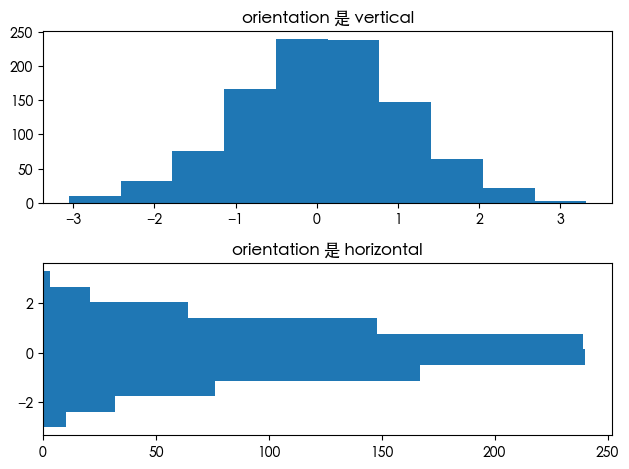

In [13]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('orientation 是 vertical')

ax2.hist(x = data[:, 0], orientation='horizontal')
ax2.set_title('orientation 是 horizontal')
fig.tight_layout()
plt.show()

## `rwidth`
每个区间的相对宽度，浮点数或 `None`，默认为 `None`。如果是 `None`，自动计算每个区间的宽度。如果参数 `histtype` 是 'step' 或 'stepfilled'，此参数无效。

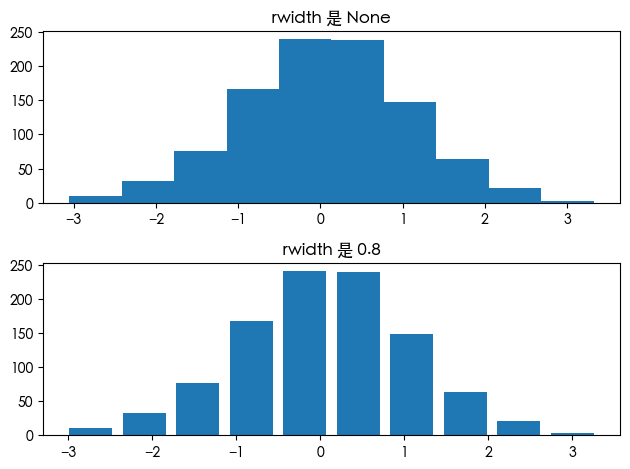

In [14]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('rwidth 是 None')

ax2.hist(x = data[:, 0], rwidth = 0.8)
ax2.set_title('rwidth 是 0.8')
fig.tight_layout()
plt.show()

## `log`
布尔值，默认是 `False`。若是 `True`，计数会被对数转换。

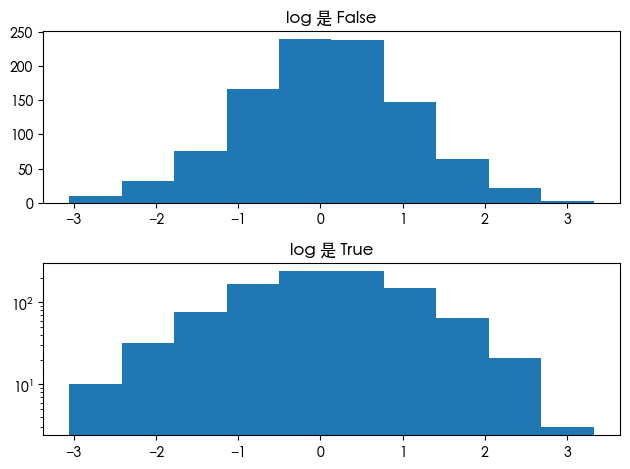

In [19]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('log 是 False')

ax2.hist(x = data[:, 0], log = True)
ax2.set_title('log 是 True')
fig.tight_layout()
fig.savefig('pics/1-6-17.png')
plt.show()

## `color`
区间的颜色，可以是单一颜色字符串，颜色序列或 `None`，默认为 `None`。每个数据集只有一个颜色。若为 `None`，会使用 plot 的颜色序列。

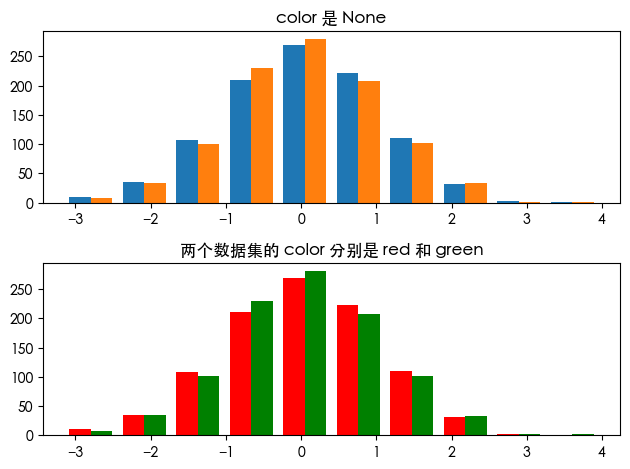

In [16]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data)
ax1.set_title('color 是 None')


ax2.hist(x = data, color = ['red', 'green'])
ax2.set_title('两个数据集的 color 分别是 red 和 green')
fig.tight_layout()
plt.show()

## `label`
数据集的标签，可以是字符串或 `None`。

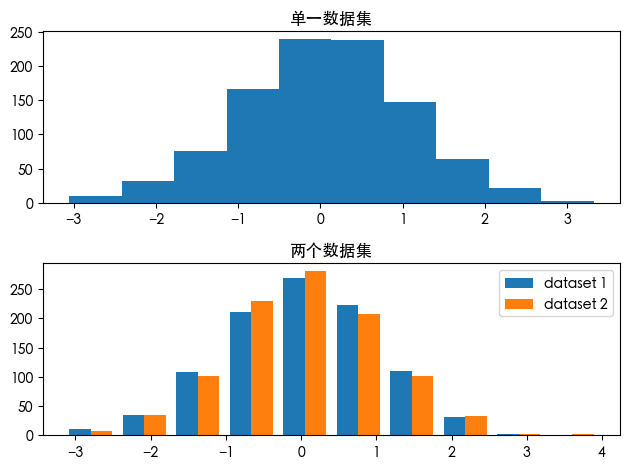

In [17]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x = data[:, 0])
ax1.set_title('单一数据集')

ax2.hist(x = data, label = ['dataset 1', 'dataset 2'])
ax2.set_title('两个数据集')
ax2.legend()
fig.tight_layout()
fig.savefig('pics/1-6-15.png')
plt.show()

## `stacked`
多个数据集是否竖向堆叠，布尔值，默认为 `False`。

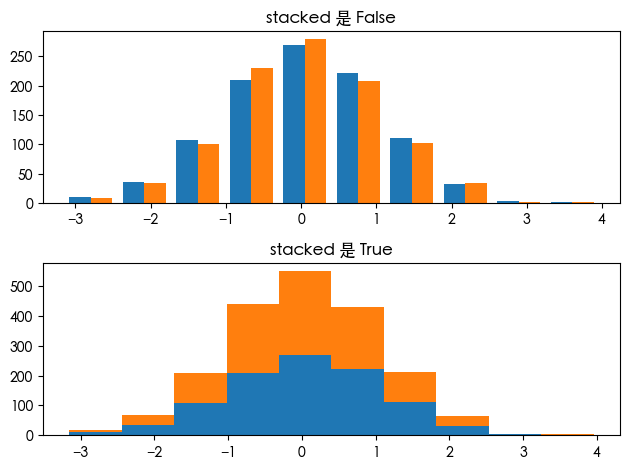

In [18]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.hist(x = data)
ax1.set_title('stacked 是 False')

ax2.hist(x = data, stacked=True)
ax2.set_title('stacked 是 True')
fig.tight_layout()
fig.savefig('pics/1-6-16.png')
plt.show()

## `**kwargs`
`matplotlib.patches.Patch` 参数，不再赘述。